In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils import *
import seaborn as sns


Open datasets and merge

In [6]:
# unpack data
dfolder = 'data/dscovr/' # location of data
df = read_year(dfolder, '2016') # open first year

# loop to collect and merge all datasets across all years
yr = 2017
while yr < 2023:
    df_yr = read_year(dfolder, str(yr))
    df = pd.concat([df, df_yr], ignore_index=True)
    yr +=1

# check    
df['time'][0]
df.head()

# dirty method for quick data overview
# print(df.describe())

,time,BX,BY,BZ,FC0,FC1,FC2,FC3,FC4,FC5,...,FC40,FC41,FC42,FC43,FC44,FC45,FC46,FC47,FC48,FC49
0,2016-01-01 00:00:00,6.83609,-3.37934,-12.9205,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 00:01:00,6.76732,-3.30194,-12.9967,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:02:00,6.39107,-2.61173,-13.3271,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 00:03:00,6.44897,-2.61525,-13.3299,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:04:00,6.58758,-2.73082,-13.2361,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clean up the data.

Note from resources page: "The PlasMAG detectors do not take data all of the time, and the Faraday cup does not make measurements over its full range every minute. Whenever and wherever no data are available, the field is filled in with an integer 0. We recommend converting these to "NaN" in your computing environment after you load the data."

In [7]:
counts = df.count() # counts per col
thrsh = 1e6 # count threshold 

# check
print(f"mean: {np.mean(counts)}, max: {max(counts)}, min:{min(counts)}")

# # convert faraday cup zeros to NaNs
# df.iloc[:,-50:].replace(0, np.nan)

# drop variables with more than 50% NaN 
# nan_count = df.isna().sum() # count of nan values  per col
df = df.dropna(axis=1, thresh=int(0.5*len(df)))

# drop cols from dataset with low counts (below threshold)
df = df.dropna(thresh=thrsh, axis=1)

df

mean: 1514407.5, max: 3101760, min:26256


,time,BX,BY,BZ,FC2,FC3,FC4,FC5,FC6,FC7,...,FC17,FC18,FC19,FC20,FC21,FC22,FC23,FC24,FC25,FC26
0,2016-01-01 00:00:00,6.83609,-3.37934,-12.920500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 00:01:00,6.76732,-3.30194,-12.996700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 00:02:00,6.39107,-2.61173,-13.327100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 00:03:00,6.44897,-2.61525,-13.329900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:04:00,6.58758,-2.73082,-13.236100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101755,2022-12-31 23:55:00,-1.95967,4.95845,-1.202990,0.231726,5.561450,16.87790,0.231726,0.231726,5.842020,...,197.433,387.537,414.127,306.559,328.288,426.053,406.802,373.910,351.469,514.026
3101756,2022-12-31 23:56:00,-1.82694,4.65083,0.351759,0.231726,17.396800,12.84820,0.231726,0.428618,11.170000,...,217.641,428.637,383.156,268.665,358.915,449.083,366.112,358.283,397.739,534.659
3101757,2022-12-31 23:57:00,-3.77304,3.87694,0.440392,0.246122,0.885469,9.77093,0.231726,0.285326,0.471761,...,227.987,388.107,390.966,316.392,351.851,415.313,394.798,404.817,433.536,568.932
3101758,2022-12-31 23:58:00,-3.18466,4.43666,1.084170,0.678061,1.230790,26.98440,0.231726,3.211080,5.997920,...,207.048,404.717,407.140,296.608,338.812,436.507,394.229,376.596,400.484,572.517


plot: overview

[Text(16436.0, 0, '2015-01-01'),
 Text(16801.0, 0, '2016-01-01'),
 Text(17167.0, 0, '2017-01-01'),
 Text(17532.0, 0, '2018-01-01'),
 Text(17897.0, 0, '2019-01-01'),
 Text(18262.0, 0, '2020-01-01'),
 Text(18628.0, 0, '2021-01-01'),
 Text(18993.0, 0, '2022-01-01'),
 Text(19358.0, 0, '2023-01-01')]

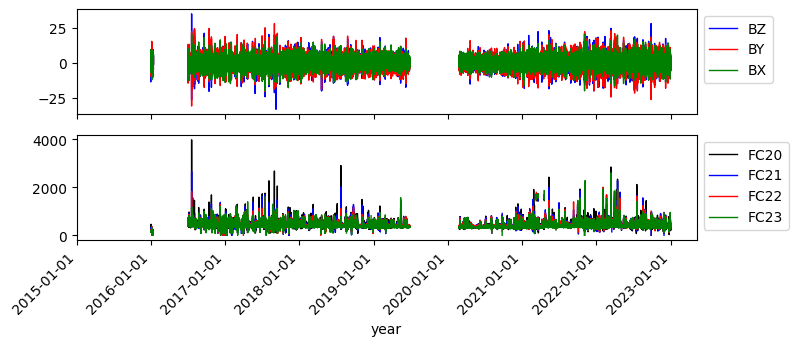

In [14]:
# quick function for plotting overview of data
def plot_var_overview(ax, t, var, ylab=False, **kwargs):
    
    var_name = var.name # get variable name

    ax.plot(t,var, linewidth=1, label=var_name, **kwargs)
    if ylab == True:
        ax.set_xlabel(f"year")
    
    # plot legend
    ax.legend(bbox_to_anchor=(1, 1))
    
# example, look at B(x,y,z)
fig, ax = plt.subplots(2, figsize=(8, 3), sharex=True) # (A/N): (8, 1) good size for single plot
plot_var_overview(ax[0],df['time'], df['BZ'], c='b')
plot_var_overview(ax[0],df['time'], df['BY'], c='r')
plot_var_overview(ax[0],df['time'], df['BX'], c='g')
plot_var_overview(ax[1],df['time'], df['FC20'], ylab = True, c='k')
plot_var_overview(ax[1],df['time'], df['FC21'], c='b')
plot_var_overview(ax[1],df['time'], df['FC22'], c='r')
plot_var_overview(ax[1],df['time'], df['FC23'], c='g')


# x-axis tick label rotation to fit length of dates
ax[1].set_xticks(ax[1].get_xticks().tolist())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')


plot: heatmap

In [9]:
# # dirty and quick heatmap
# dfcorr = df.corr() # corr matric for dataframe
# fig, ax = plt.subplots(figsize=(22,22))     
# sns.heatmap(dfcorr, annot=True, ax=ax, vmin=-1)